In [8]:
from Binaries import *

Events = EventGenerator("19_19.5", split = 1, apply_downsampling = True)
TestTrace = Events.__getitem__(0)

[INFO] -- LOADING LO_QUI_DON: randoms2856.csv                                                            


In [10]:
for trace in TestTrace:
    print(trace)

||                      S===================================S         || 2.8859e+19 eV @ 535 m from core   
||                      S======S                                      || 2.8859e+19 eV @ 913 m from core   
||                      S====================S                        || 2.8859e+19 eV @ 939 m from core   
||                      S==================S                          || 2.8859e+19 eV @ 1481 m from core   
||                      S======S                                      || 2.8859e+19 eV @ 1642 m from core   
||                      S============S                                || 2.8859e+19 eV @ 1691 m from core   
||                      S============S                                || 2.8859e+19 eV @ 1867 m from core   
||                      S========S                                    || 2.8859e+19 eV @ 1664 m from core   
||                      S===S                                         || 2.8859e+19 eV @ 2122 m from core   
||                    

[]

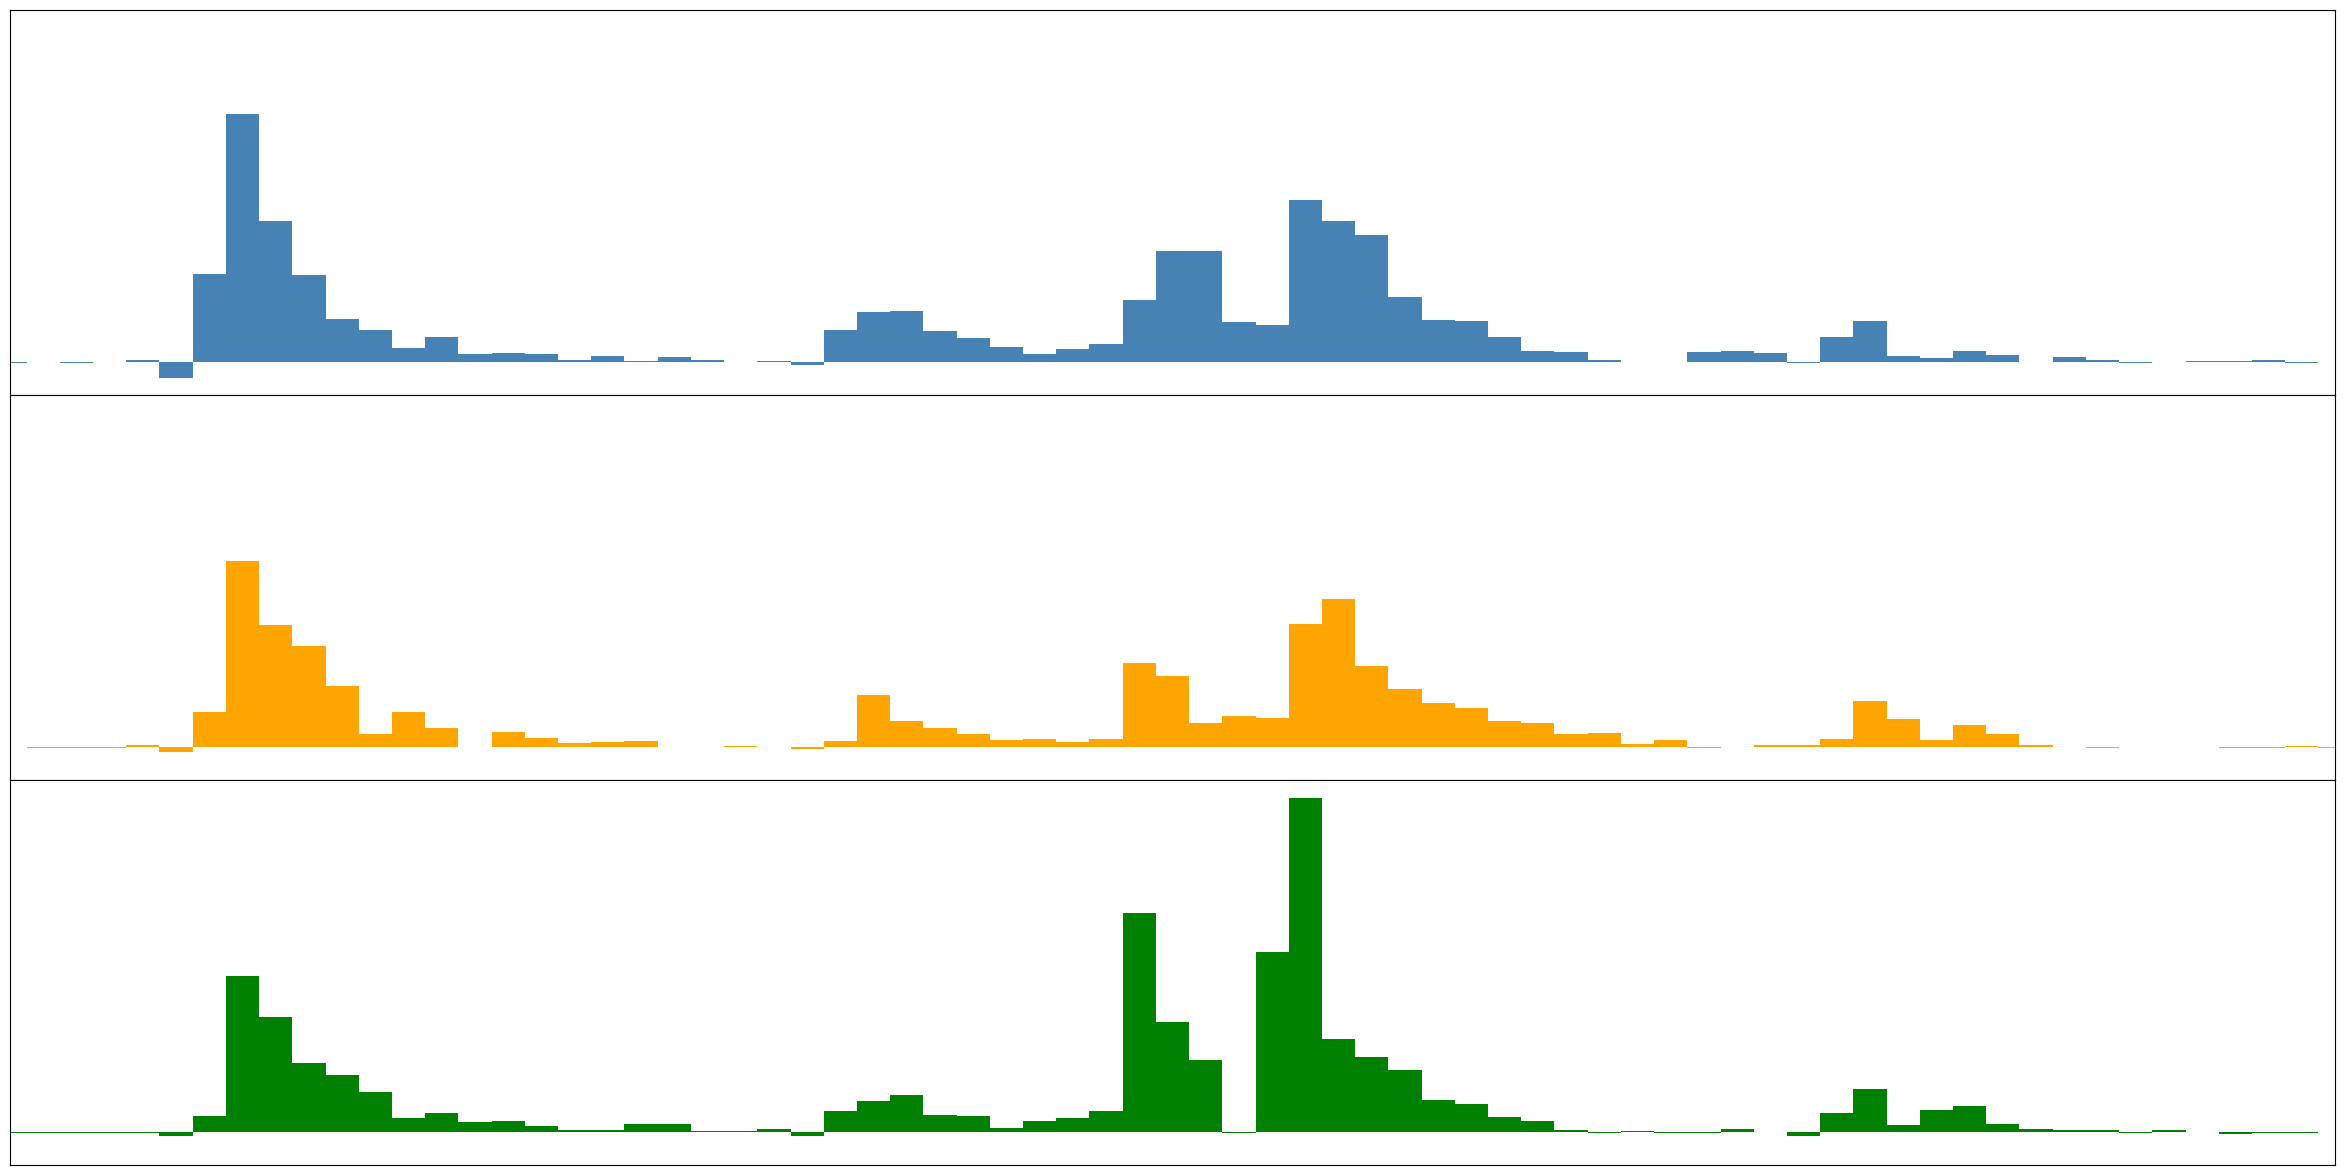

In [29]:
t = TestTrace[-7]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex = True, sharey = True)

ax1.bar(range(682), t.pmt_1, color = "steelblue", width = 1)
ax2.bar(range(682), t.pmt_2, color = "orange", width = 1)
ax3.bar(range(682), t.pmt_3, color = "green", width = 1)
ax3.set_xlim(220, 290)

plt.subplots_adjust(hspace = 0)
ax3.set_xticks([])
ax3.set_yticks([])

([], [])

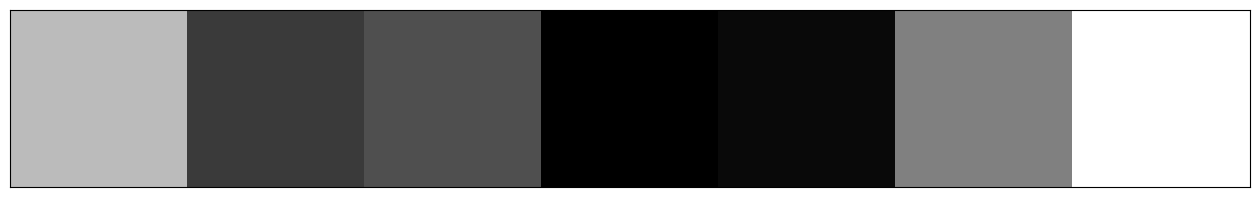

In [46]:
n_rows, n_cols = 1, 7

matrix = np.random.uniform(size = (n_rows, n_cols))

# matrix[0, 3] = 0

plt.matshow(matrix, cmap = "Greys")
plt.xticks([])
plt.yticks([])

/tmp/ipykernel_1397730/3992849786.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  binary_cmap = plt.cm.get_cmap("binary", 100)


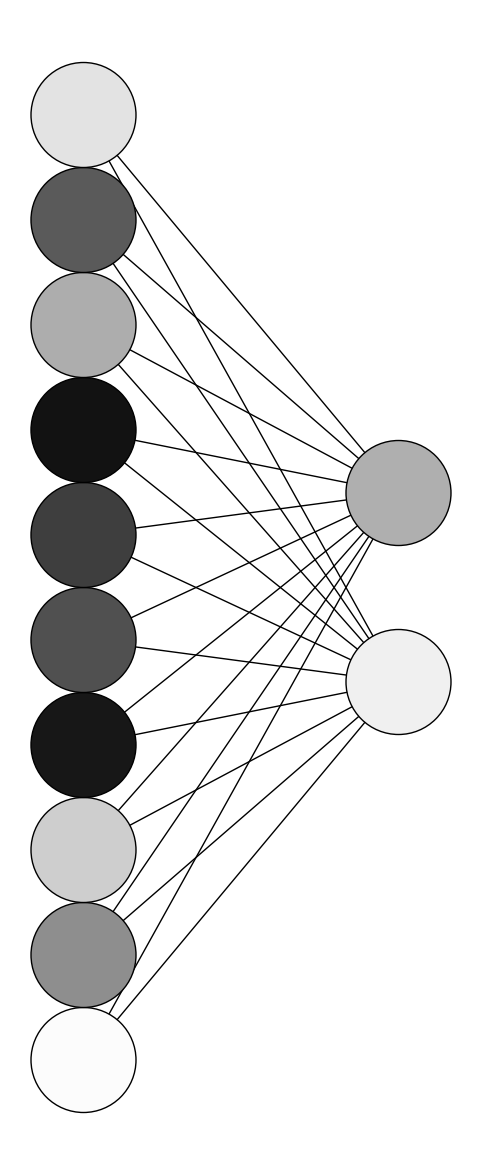

In [75]:
binary_cmap = plt.cm.get_cmap("binary", 100)

class Layer():

    def __init__(self, x : int, size : int, separation : float):

        self.x = x
        self.ys = np.linspace(-size/2 * separation, size/2 * separation, size)

        for y in self.ys:
            
            color = binary_cmap(np.random.randint(0, 100))
            ax.add_patch(plt.Circle((x,y), 0.5, fc = color, ec = "k"))

    def connect(self, other):

        x_i = other.x
        x_f = self.x

        for y_f in self.ys:
            for y_i in other.ys:
                plt.plot([x_i, x_f],[y_i, y_f], c = "k", lw = 1, zorder=0)

    def inject(self):

        for y_f in self.ys:

            n_injected = np.random.randint(1,10)
            for n in range(n_injected):
                length = np.random.uniform(7,15)
                theta = np.random.normal(np.pi + 0.2 * (length * y_f) * np.pi/180, 15 * np.pi/180)

                line = Line((self.x,y_f), theta, length)
                line()


class Network():

    def __init__(self, architecture : tuple):

        layers = []

        for i, size in enumerate(architecture):

            layer = Layer(i * 3, size, 0.9)
            layers.append(layer)

            if i != 0:
                layer.connect(layers[i-1])
            # else:
            #     layer.inject()

fig, ax = plt.subplots()
Network((10,2))
ax.set_aspect("equal")
plt.axis("off")
plt.show()

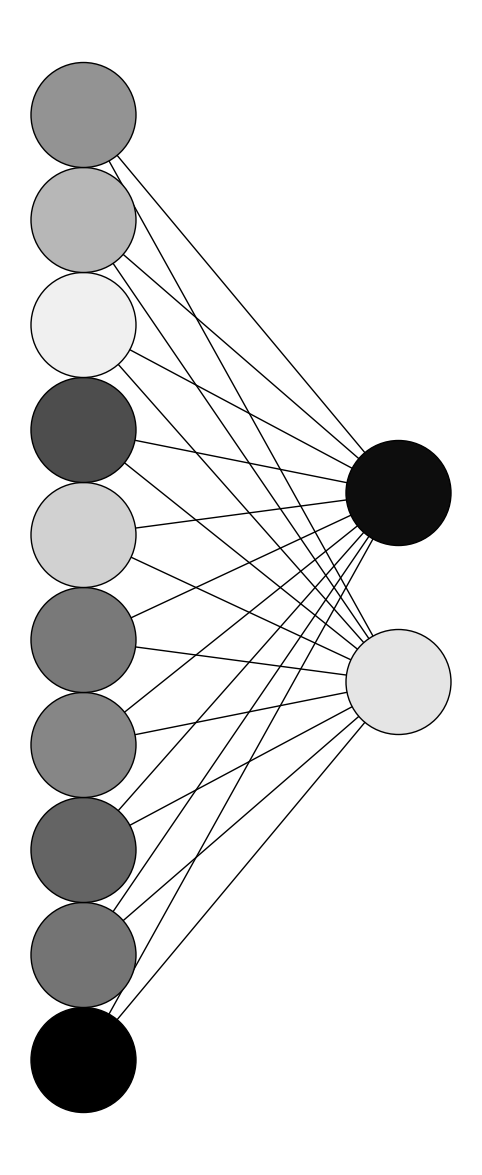

In [80]:
fig, ax = plt.subplots()
Network((10,2))
ax.set_aspect("equal")
plt.axis("off")
plt.show()